## 연합뉴스 타이틀 주제 분류 데이터 탐색과 시각화
* 데이터셋 출처 : 
    * [뉴스 토픽 분류 AI 경진대회 - DACON](https://dacon.io/competitions/official/235747/overview/description)
    * [KLUE Benchmark](https://klue-benchmark.com/)

In [2]:
# 실습에서 wordcloud 를 사용하기 때문에 설치되어 있지 않다면 설치를 해주세요!
# wordcloud 설치 아나콘다 사용시 conda 명령어 설치 권장
!pip install wordcloud
# !conda install -c conda-forge wordcloud

  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\stat510\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-lz4doo1c\\wordcloud_c23deb4f4128488fb41385783aec0b29\\setup.py'"'"'; __file__='"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-lz4doo1c\\wordcloud_c23deb4f4128488fb41385783aec0b29\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-wheel-22ujaz5s'
       cwd: C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-install-lz4doo1c\wordcloud_c23deb4f4128488fb41385783aec0b29\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
 

## 라이브러리 로드

In [6]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 폰트 설정

In [7]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [8]:
# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_5004/2077700862.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<AxesSubplot:title={'center':'한글'}>

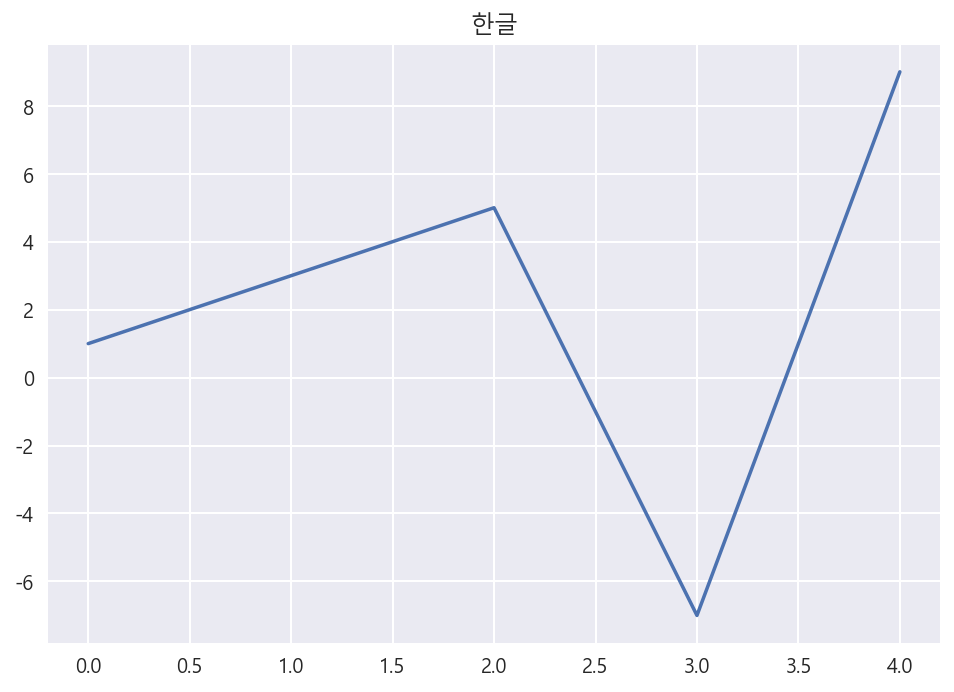

In [12]:
# 한글폰트 동작확인
pd.Series([1,3,5,-7,9]).plot(title="한글")

## 데이터 로드

In [14]:
import os
fpath = "data/train_data.csv"
if os.path.exists(fpath):
    print("해당 경로에 파일이 있습니다.")
else:
    file_path = os.getcwd() +"/"+ fpath
    print(f"{file_path} 경로를 확인해 주세요.")
    print("출력되는 경로를 파일 탐색기로 열어 들어갔을 때 해당 파일이 있어야 합니다.")

해당 경로에 파일이 있습니다.


In [20]:
# 학습(data/klue/train_data.csv), 예측(data/klue/test_data.csv) 데이터셋을 불러오고 
# shape 로 행과 열의 크기를 출력합니다.
# train
# test
train = pd.read_csv("data/train_data.csv")
test = pd.read_csv('data/test_data.csv')
train.shape, test.shape

((45654, 3), (9131, 2))

In [25]:
# head 로 train의 상위 5개 데이터를 가져옵니다.
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [24]:
# head 로 test의 상위 5개 데이터를 가져옵니다.
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [28]:
# 토픽(topic_dict.csv)을 불러옵니다.
# topic
topic = pd.read_csv('data/topic_dict.csv')
topic # 0번부터 6번까지 총 7개의 topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


## 전처리를 위한 데이터 병합
* 학습, 예측 세트를 똑같이 전처리 해주기 위해 각각 같은 방법을 적용해 줄 수도 있지만
* 두 데이터를 병합해서 전처리를 해주고 다시 나눠주겠습니다.

In [31]:
# 토픽에 어떤 값이 있는지 values로 봅니다. 
topic["topic"].values

array(['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치'], dtype=object)

### 5.1 concat
<img src="https://pandas.pydata.org/docs/_images/08_concat_row.svg" width="500">

In [35]:
# 전처리를 위해 concat으로 데이터 병합
# raw
raw = pd.concat([train,test]) # 행끼리 연결 (axis = 0)
raw.shape

(54785, 3)

In [ ]:
train.shape[0]+test.shape[0]

In [39]:
# head
raw.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0


In [41]:
# tail
raw.tail()

,index,title,topic_idx
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여,NaN
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합,NaN
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개,NaN
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계,NaN
9130,54784,유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구,NaN


### 5.2 merge
<img src="https://pandas.pydata.org/docs/_images/08_merge_left.svg">

<img src="https://i.imgur.com/nD1Hwdl.png" width=500>

* 실제 토픽명을 볼 수 있도록 topic_idx 를 키값으로 merge 합니다.

In [45]:
raw.shape

(54785, 3)

In [50]:
# raw 를 topic 데이터와 merge(how="left") 합니다.
# df
df = raw.merge(topic) # 이렇게 하면  inner join 
# raw.merge(topic, on = 'topic_idx')

# raw의 값을 모두 가지고 오고 싶다 = left join 
df = raw.merge(topic, on = 'topic_idx', how = 'left')

# 반대로 topic에 맵핑되는 것만 가지고 오고 싶다면 
# raw.merge(topic, on = 'topic_idx', how = 'right')

In [51]:
# merge 가 잘 되었는지 head 로 확인
df.head()

,index,title,topic_idx,topic
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계


## 6. 정답값 빈도수
* train 에서 제공하는 정답값의 빈도수

In [55]:
# test는 결측치(Nan: Not a number)로 되어 있기 때문에 빈도수에 포함되지 않습니다.
# topic_idx 의 빈도수를 구합니다.
df["topic_idx"].value_counts()

4.0    7629
2.0    7362
5.0    6933
6.0    6751
1.0    6222
3.0    5933
0.0    4824
Name: topic_idx, dtype: int64

In [58]:
# topic 의 빈도수를 구합니다.
df["topic"].value_counts()

세계      7629
사회      7362
스포츠     6933
정치      6751
경제      6222
생활문화    5933
IT과학    4824
Name: topic, dtype: int64

<AxesSubplot:xlabel='topic', ylabel='count'>

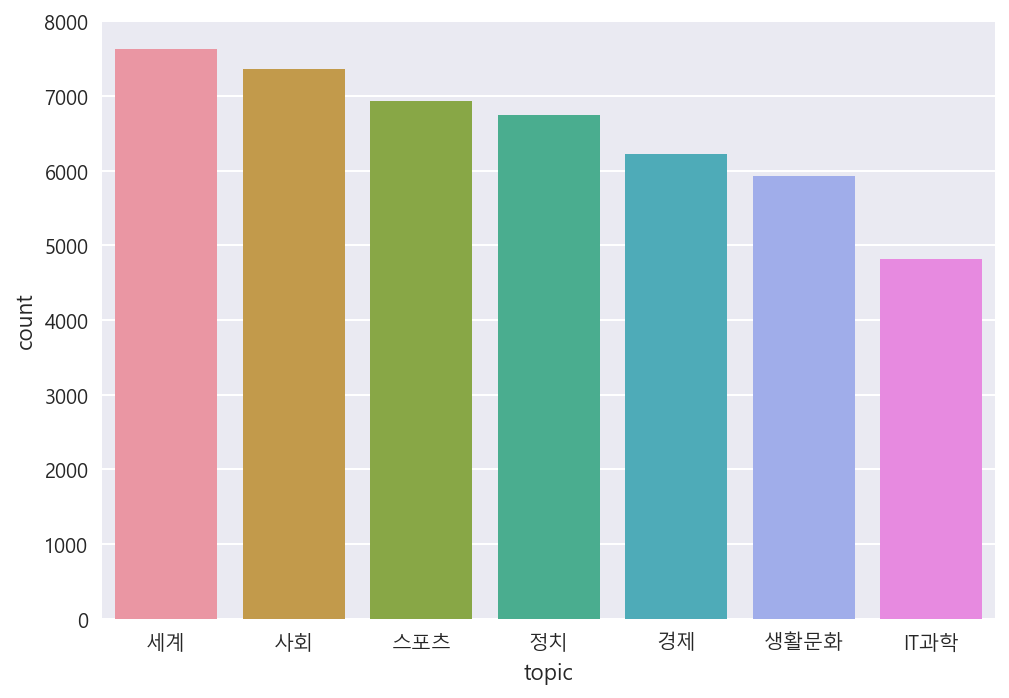

In [61]:
# df 로 빈도수를 구했지만 test 데이터는 topic이 결측치라 포함되지 않습니다. 
sns.countplot(data=df, x = 'topic', order = df["topic"].value_counts().index)

## 7. 문자 길이


|| Series | DataFrame | 사용 예 |
|---|---|---|---|
|map|O|X|df[“컬럼명”].map(함수 or dict)|
|apply|O|O|df.apply(함수) <br/> df[“컬럼명”].apply(함수)|
|applymap|X|O|df.applymap(함수)|

In [83]:
# apply, lambda를 통해 문자, 단어 빈도수 파생변수 만들기
# df["len"]
# df["word_count"]
# df["unique_word_count"]

# 문자열의 길이 
df['len'] = df['title'].map(lambda x : len(x))
df['len'] = df['title'].apply(lambda x : len(x))
# 단어의 개수 -> split()
df["word_count"] = df['title'].apply(lambda x: len(x.split()))
# 중복을 제거한 단어의 개수 -> set() 
df["unique_word_count"] = df['title'].apply(lambda x: len(set(x.split())))

In [84]:
# 파생변수가 잘 만들어졌는지 확인하기
df.head()

,index,title,topic_idx,topic,len,unique_word_count,word_count
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4.0,세계,24,5,5
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4.0,세계,30,6,6
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4.0,세계,30,8,8
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4.0,세계,32,7,7
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4.0,세계,25,7,7


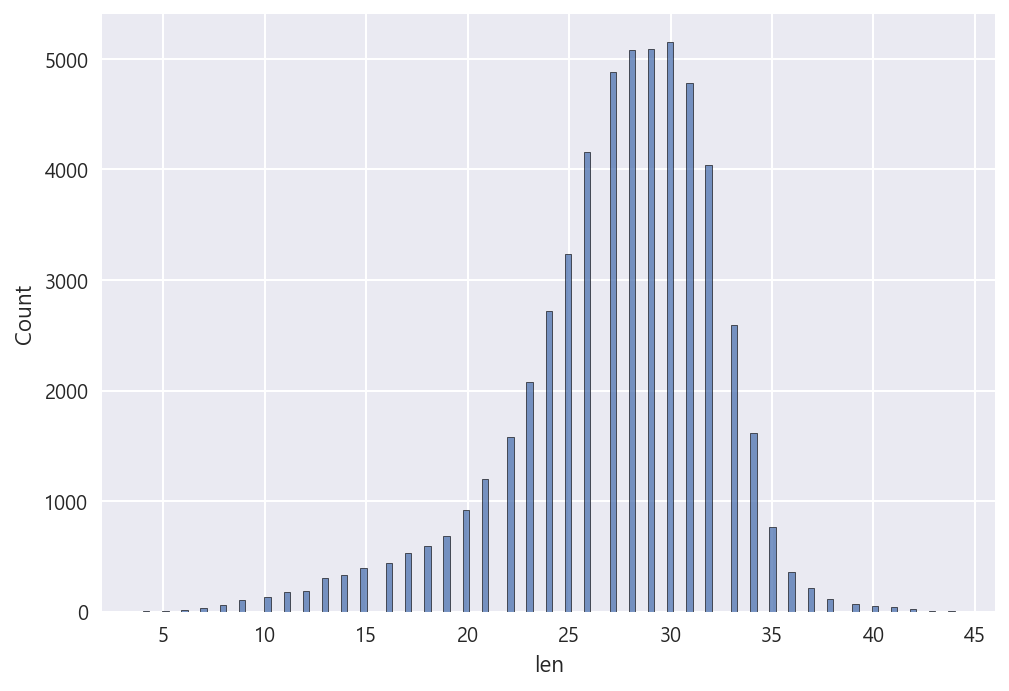

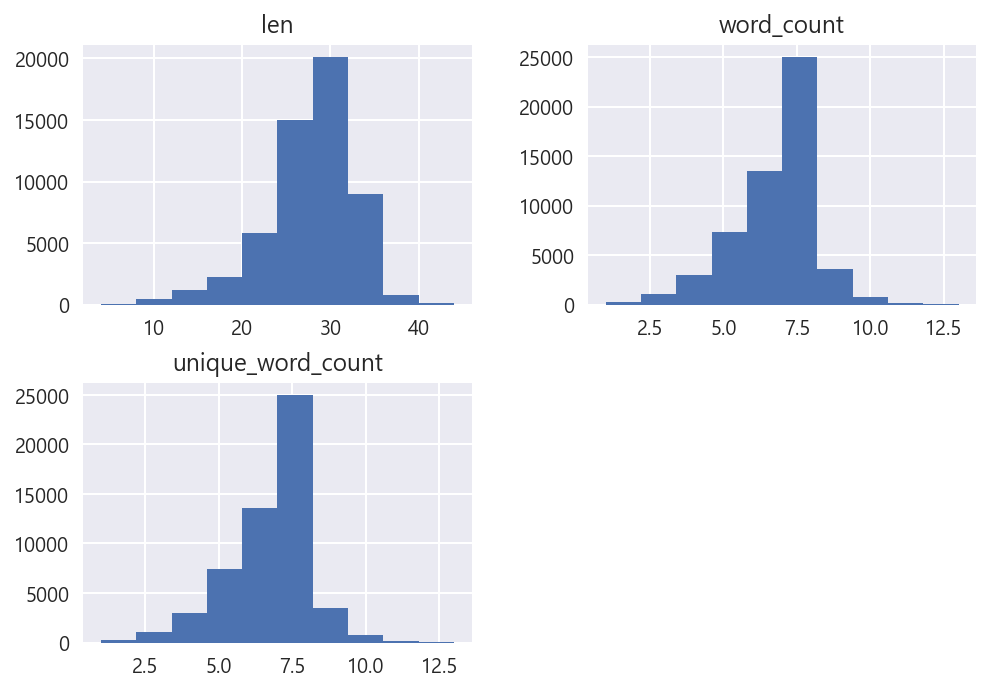

In [93]:
# 서브플롯을 통해  "len", "word_count", "unique_word_count"의 histplot 을 시각화 합니다.
sns.histplot(data = df, x ="len")
df[['len','word_count','unique_word_count']].hist(bins =10) # 서브 플롯  # bins는 막대개수 
plt.show() # log 안찍히게 

In [95]:
# "len", "word_count", "unique_word_count" 의 기술통계 값을 구합니다.
df[['len','word_count','unique_word_count']].describe()

,len,word_count,unique_word_count
count,54785.000000,54785.000000,54785.000000
mean,27.318846,6.587880,6.576198
std,4.947738,1.471852,1.465320
min,4.000000,1.000000,1.000000
25%,25.000000,6.000000,6.000000
50%,28.000000,7.000000,7.000000
75%,31.000000,8.000000,8.000000
max,44.000000,13.000000,13.000000


<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

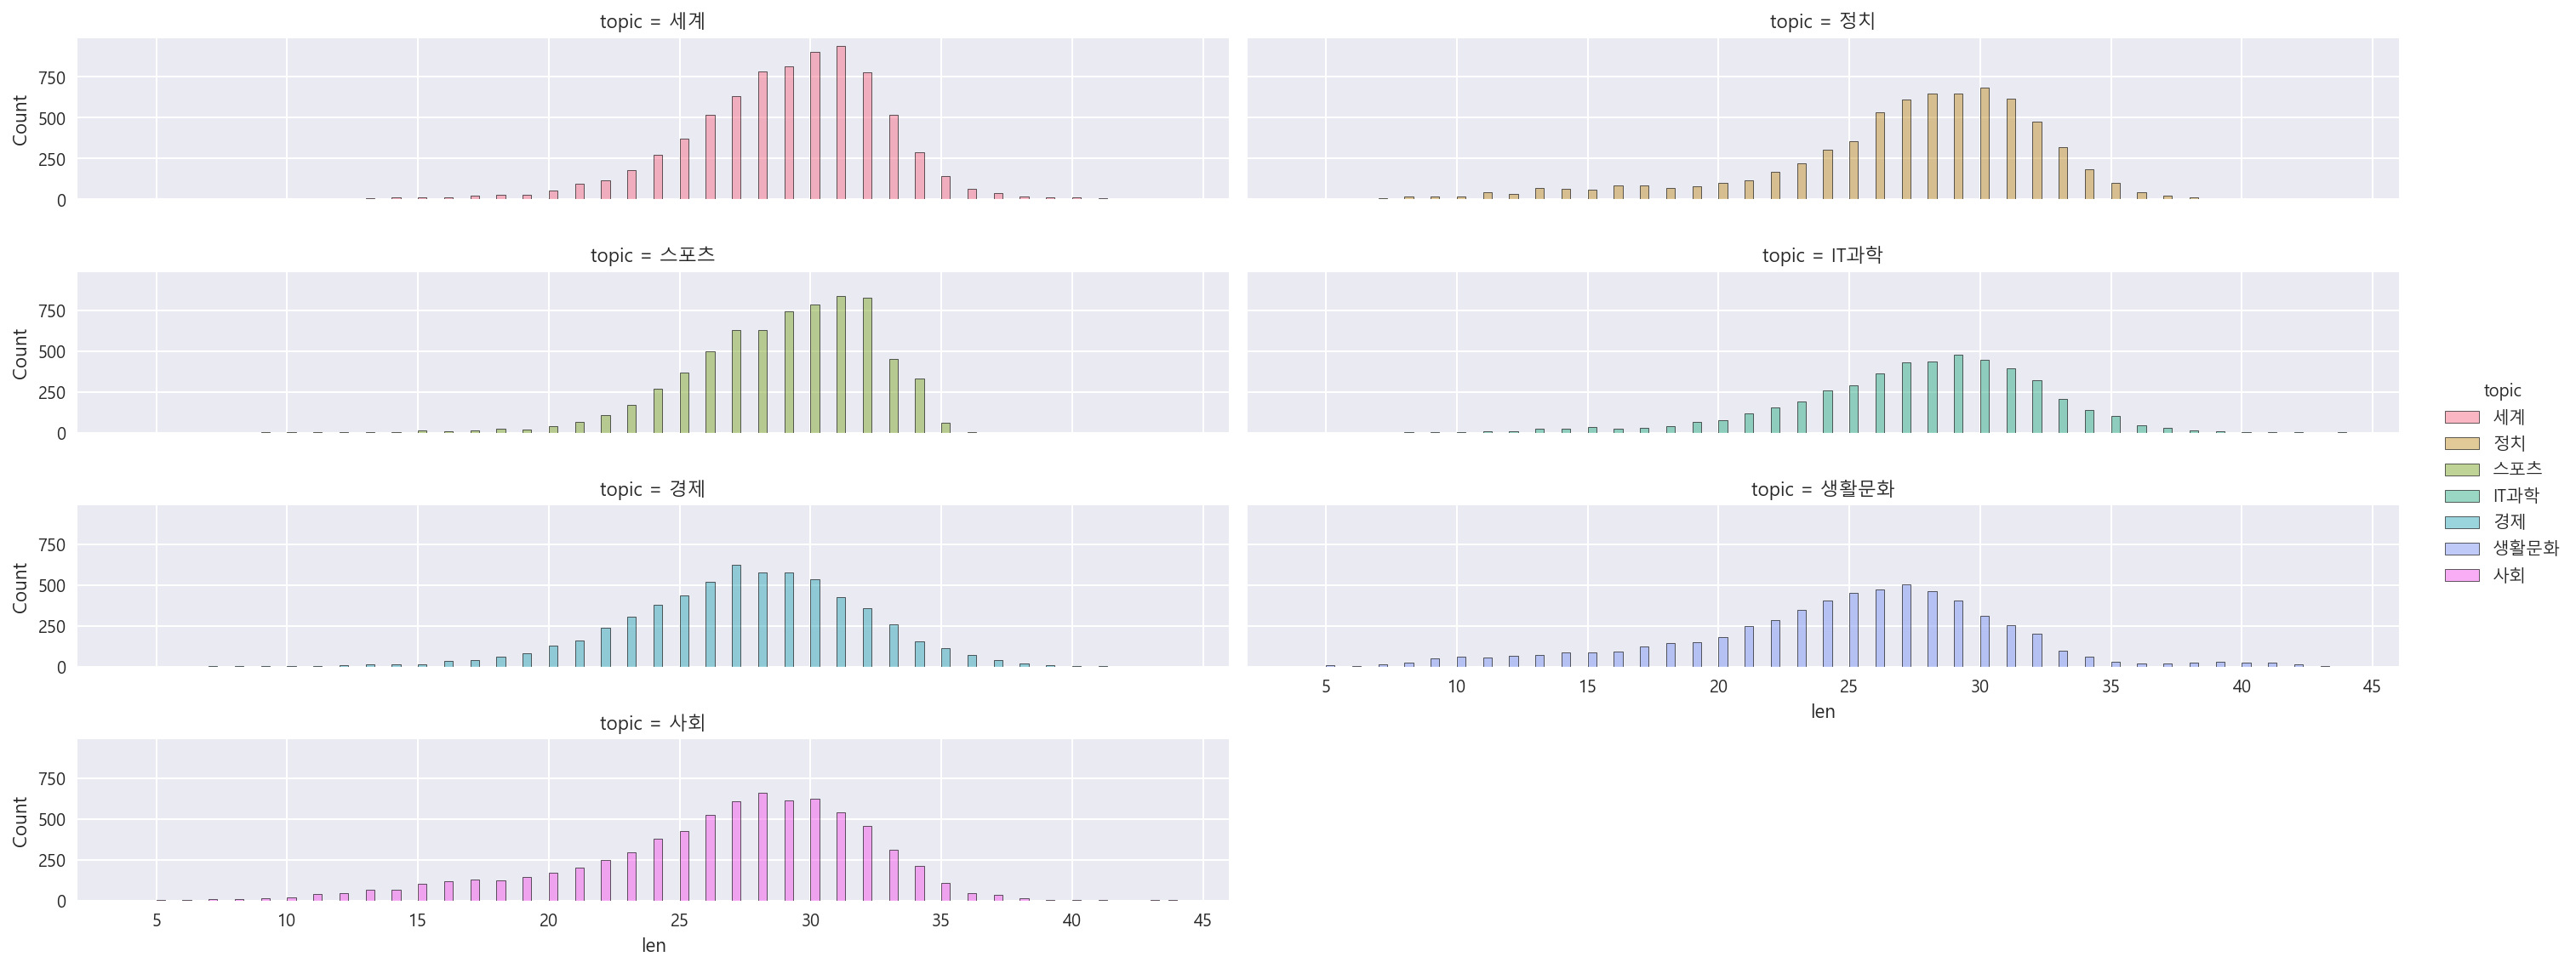

In [102]:
# 문장길이
# displot 으로 topic 별 "len" 의 histplot 시각화 하기 --> 서브 플롯이라고 부름 
# data=df, x="len", kind="hist", hue="topic", col="topic", col_wrap=2, aspect=5, height=2
sns.displot(data = df, x = 'len', col = 'topic', hue = 'topic',
            col_wrap = 2 , height=2 , aspect= 5)

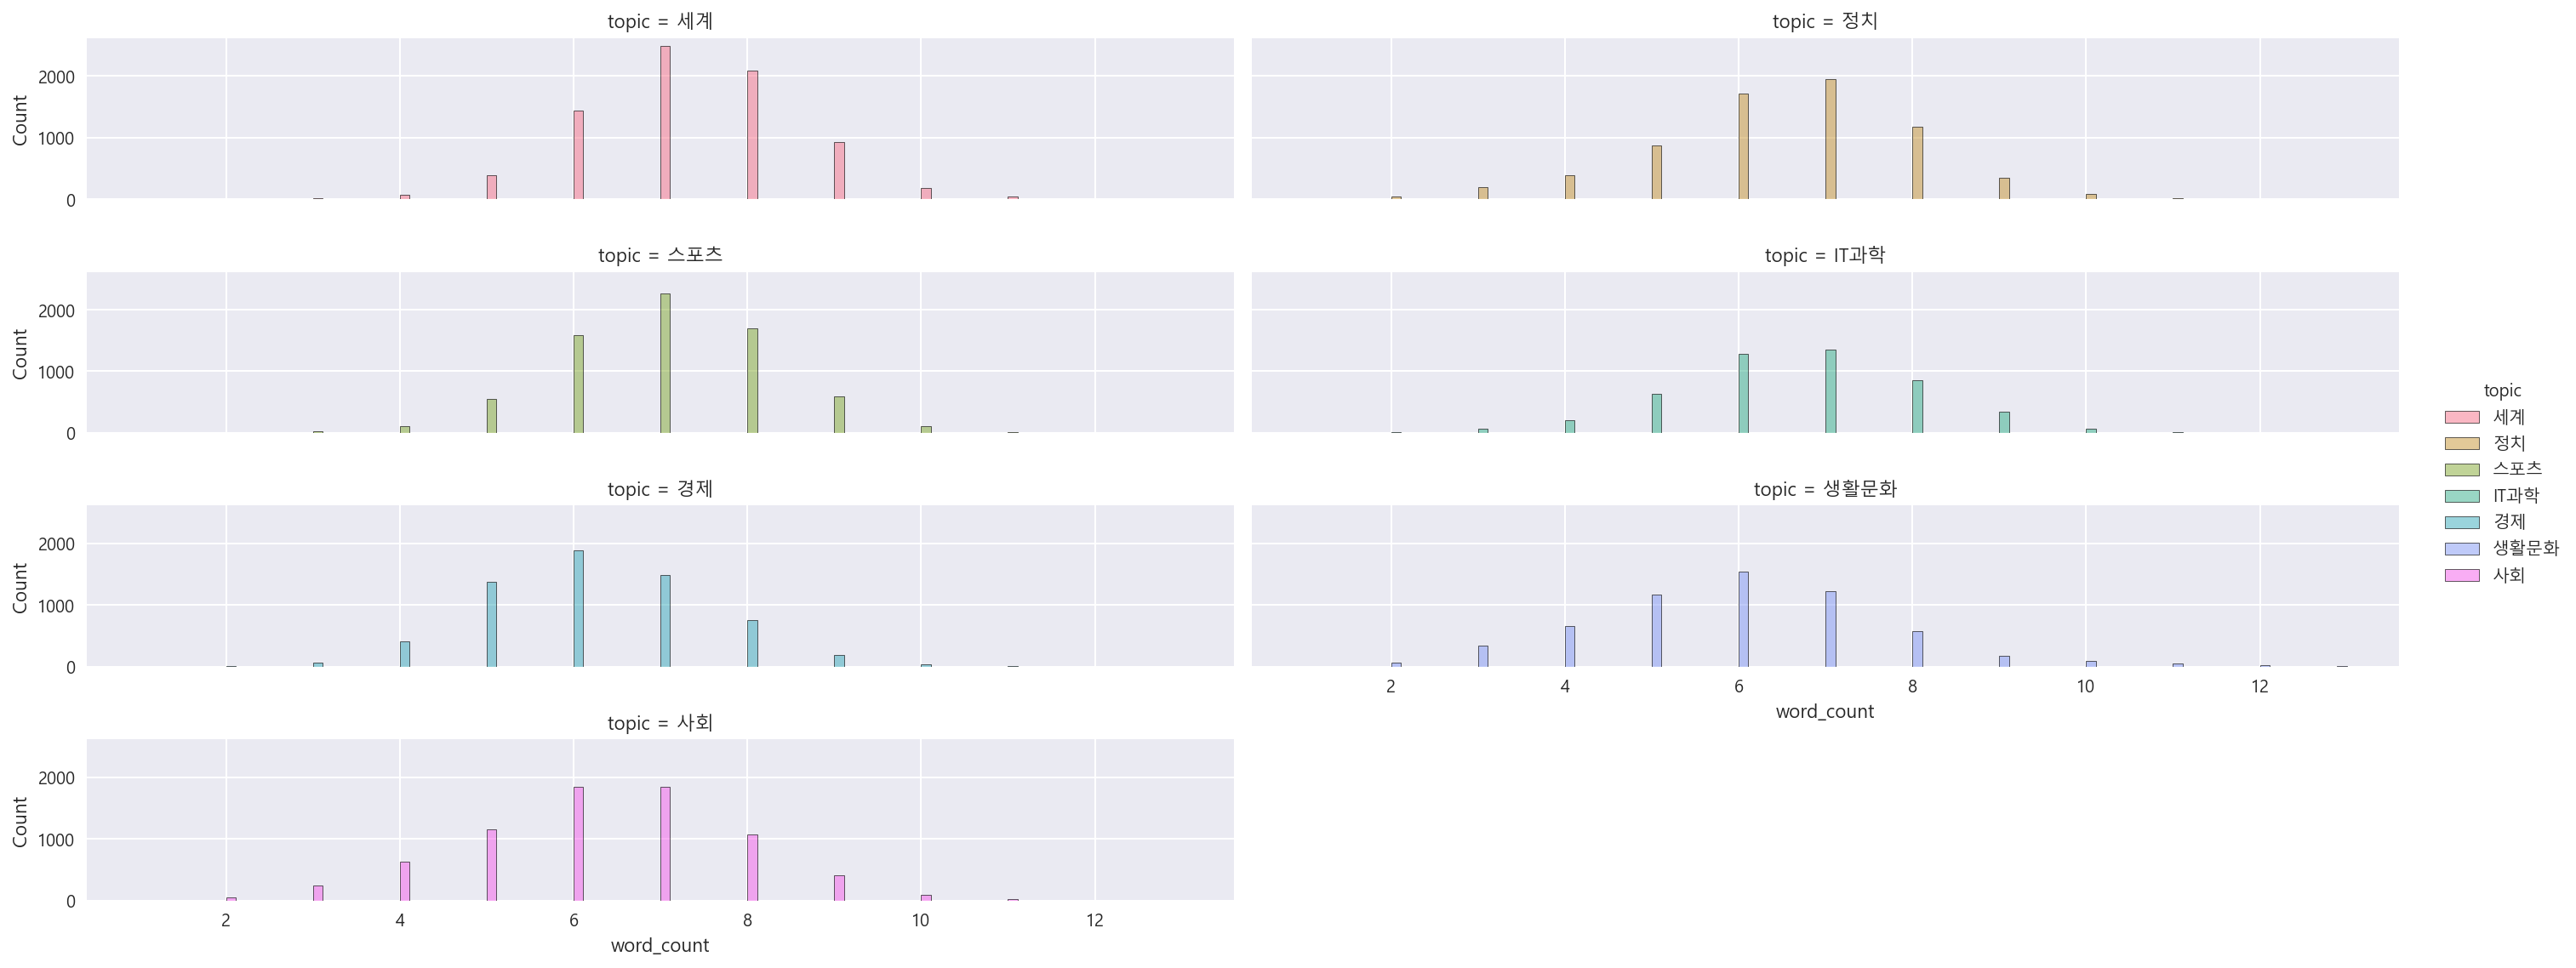

In [108]:
# 단어 수
# displot 으로 topic 별 "word_count" 의 histplot 시각화 하기
sns.displot(data=df, x = "word_count" , col = "topic" , hue = "topic",
           col_wrap=2 , height=2 , aspect=5)

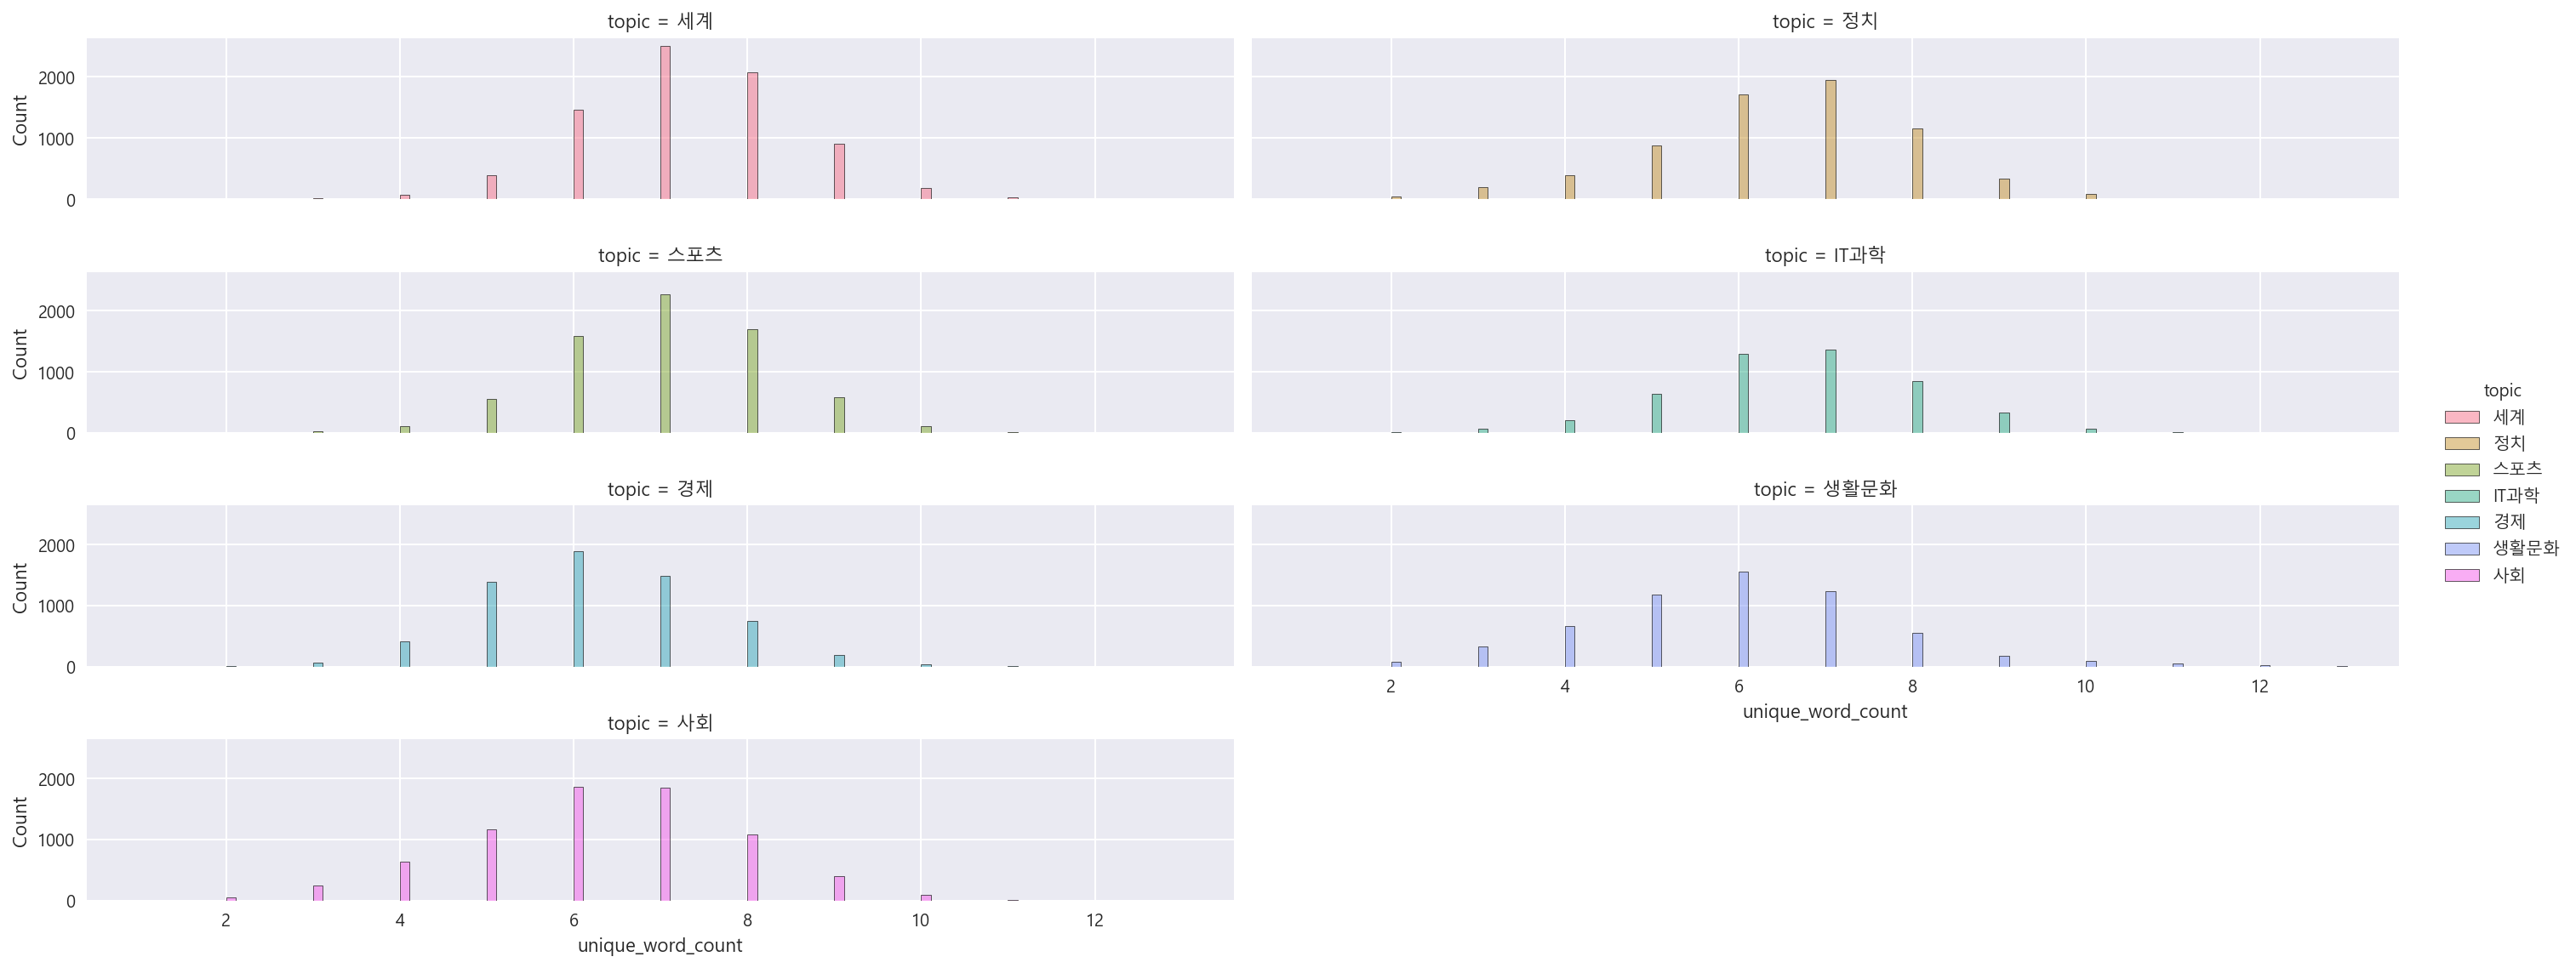

In [109]:
# 중복 제거 단어 수
# displot 으로 topic 별 "unique_word_count" 의 histplot 시각화 하기
sns.displot(data=df, x = "unique_word_count" , col = "topic" , hue = "topic",
           col_wrap=2 , height=2 , aspect=5)

<AxesSubplot:>

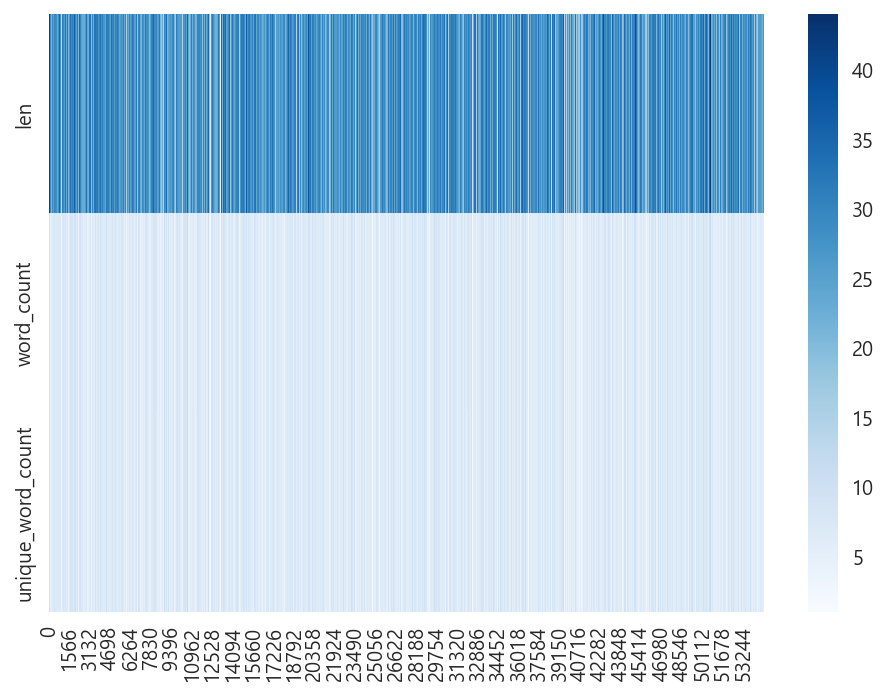

In [116]:
# heatmap 을 통한 "len", "word_count", "unique_word_count" 시각화
sns.heatmap(df[['len','word_count','unique_word_count']].T, cmap="Blues")

## 8. 문자 전처리
### 8.1 숫자 제거

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


In [120]:
# map, 정규표현식의 re.sub 을 통해 숫자제거
import re
df["title"].map(lambda x: re.sub("[0-9]","",x))

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780             인천 오후 시분 대설주의보…눈 .cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

In [124]:
# 판다스의 str.replace 기능을 통해 제거
df["title"].str.replace("[0-9]","", regex = True)

0                인천→핀란드 항공기 결항…휴가철 여행객 분통
1            실리콘밸리 넘어서겠다…구글 조원 들여 美전역 거점화
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망
                       ...               
54780             인천 오후 시분 대설주의보…눈 .cm 쌓여
54781       노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782           년 전 부마항쟁 부산 시위 사진 점 최초 공개
54783       게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784     유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구
Name: title, Length: 54785, dtype: object

### 8.2 특수 문자 제거

In [125]:
# 특수 문자 제거 시 구두점 참고
import string

punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [131]:
# 특수 문자 사용시 정규표현식에서 메타 문자로 특별한 의미를 갖기 때문에 역슬래시를 통해 예외처리를 해주어야 합니다.
# [!\"\$\*] 일부 특수문자 제거 연습
df["title"].str.replace("[ \[ ]","", regex=True)
df["title"].str.replace("[ \. ]","", regex=True)
df['title'] = df["title"].str.replace("[ !?\.\"\$ ]","", regex=True)

### 8.3 영문자는 모두 소문자로 변경
* 대소문자가 섞여 있으면 다른 다른 단어로 다루기 때문

In [134]:
df['title'] = df["title"].str.lower()
df['title']

0              인천→핀란드항공기결항…휴가철여행객분통
1         실리콘밸리넘어서겠다…구글15조원들여美전역거점화
2           이란외무긴장완화해결책은미국이경제전쟁멈추는것
3        nyt클린턴측근韓기업특수관계조명…공과사맞물려종합
4               시진핑트럼프에중미무역협상조속타결희망
                    ...            
54780        인천오후3시35분대설주의보…눈31cm쌓여
54781       노래방에서지인성추행외교부사무관불구속입건종합
54782          40년전부마항쟁부산시위사진2점최초공개
54783      게시판아리랑tv아프리카개발은행총회개회식생중계
54784     유영민과기장관강소특구는지역혁신의중심…지원책강구
Name: title, Length: 54785, dtype: object

### 8.4 한글, 영문과 공백만 남기고 모두 제거

In [139]:
# 정규표현식 [^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z] 을 사용하면 한글과 공백만 남기고 제거하게 됩니다.
df["title"] = df["title"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z0-9]", " " , regex=True )
# ^는 뒤에 오는 패턴이 아닌 패턴  한글, 영어 , 숫자가 아니면 공백으로 바꾸기 

df["title"] = df["title"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]", " " , regex=True )
# 한글, 영어가 아니면 공백으로 바꾸기 

### 8.5 공백 여러 개는 하나로

In [141]:
# 공백 여러 개 전처리 예시
import re
re.sub("[\s]+", " ", "공백             전처리") 
# 공백을 '역슬래쉬 s(space)'로 표현 
# +은 공백이 하나이상 존재(공백이 여러개)하는 경우를 의미함 

'공백 전처리'

In [143]:
# 여러 개의 공백을 하나의 공백으로 치환해 줍니다.
df["title"].str.replace("[ \s ]+", " ", regex=True)

0              인천 핀란드항공기결항 휴가철여행객분통
1          실리콘밸리넘어서겠다 구글 조원들여 전역거점화
2           이란외무긴장완화해결책은미국이경제전쟁멈추는것
3        nyt클린턴측근 기업특수관계조명 공과사맞물려종합
4               시진핑트럼프에중미무역협상조속타결희망
                    ...            
54780          인천오후 시 분대설주의보 눈 cm쌓여
54781       노래방에서지인성추행외교부사무관불구속입건종합
54782            년전부마항쟁부산시위사진 점최초공개
54783      게시판아리랑tv아프리카개발은행총회개회식생중계
54784     유영민과기장관강소특구는지역혁신의중심 지원책강구
Name: title, Length: 54785, dtype: object

### 8.6 불용어 제거

In [144]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다', 
             '그리고', '입니다', '그', '등', '이런', '및','제', '더']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [146]:
# map을 사용하여 불용어 제거하기
df["title"] = df["title"].map(remove_stopwords)

## 9. 워드클라우드

* https://github.com/amueller/word_cloud

* 불용어, 자주 등장하는 단어, 주제별 단어 등을 시각화 하기에 좋습니다.

In [151]:
# wordcloud 설치 아나콘다 사용시 conda 명령어 설치 권장
!pip install wordcloud
# !conda install -c conda-forge wordcloud

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\stat510\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-9t3nwac1\\wordcloud_f4b1e9607b6d45988a349ddf0aeb957a\\setup.py'"'"'; __file__='"'"'C:\\Users\\Public\\Documents\\ESTsoft\\CreatorTemp\\pip-install-9t3nwac1\\wordcloud_f4b1e9607b6d45988a349ddf0aeb957a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-wheel-da6vaayh'
       cwd: C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-install-9t3nwac1\wordcloud_f4b1e9607b6d45988a349ddf0aeb957a\



  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-3.9\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-3.9\wordcloud
  UPDATING build\lib.win-amd64-3.9\wordcloud/_version.py
  set build\lib.win-amd64-3.9\wordcloud/_version.py to '1.8.1'
  running build_ext
  building 'wordcloud.query_integ

In [156]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=["합니다", "입니다"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

In [ ]:
# join()을 이용하여 변수 title 리스트에서 문자열로 변환해 줍니다.
# content

In [ ]:
# content를 위에서 만든 함수인 display_word_cloud로 워드클라우드를 시각화 해봅니다.


## 특정 토픽만 워드클라우드 시각화

In [ ]:
# topic 의 unique 값만 보기


In [ ]:
# df.loc로 특정 토픽만 가져와서 join으로 문자열을 연결해 줍니다.


In [ ]:
# display_word_cloud 로 시각화
